In [1]:
import numpy as np
import pandas as pd

In [58]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
from sklearn.datasets import load_digits
from sklearn import ensemble, metrics
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

## Описание датасета

In [7]:
digits = load_digits()

In [8]:
digit_data = digits.data
digit_label = digits.target

In [14]:
print(digit_data.shape)
print(digit_label.shape)

(1797, 64)
(1797,)


## Задание 1

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score.

In [37]:
DTC = DecisionTreeClassifier()

In [38]:
# посмотрели кач-во работы на 10 запусках алгоритма.
for i in range(10):
    ans = cross_val_score(DTC, digit_data, digit_label, cv = 10).mean()
    print(ans)

0.8376323169526266
0.8236119291519062
0.8365307583603357
0.8291883822879026
0.8369136021348286
0.8258558327950943
0.8240671061935887
0.8309064466411584
0.8241684328174037
0.8259174822447337


In [39]:
#записали в ответ последний, по сути разница между ними небольшая.
with open("ans1.txt", "w") as fout:
    fout.write(str(ans))

## Задание 2

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100.

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [41]:
BC = ensemble.BaggingClassifier(DTC, n_estimators=100)

In [42]:
for _ in range(10):
    ans2 = cross_val_score(BC, digit_data, digit_label, cv = 10).mean()
    print(ans2)

0.9265234453737332
0.9215717705574089
0.923192749643355
0.9282039386814216
0.9260484970085493
0.9288012995210224
0.9271020661699559
0.9215858060217702
0.9248501041670588
0.9237576409129489


In [43]:
with open("ans2.txt", "w") as fout:
    fout.write(str(ans2))

## Задание 3

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ 
​	  случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [45]:
max_features = int(np.sqrt(digit_data.shape[1]))

BC_sqrt = ensemble.BaggingClassifier(DTC, n_estimators=100, max_features = max_features)

In [46]:
for _ in range(5):
    ans3 = cross_val_score(BC_sqrt, digit_data, digit_label, cv = 10).mean()
    print(ans3)

0.9310012206122658
0.9382069089440345
0.9371355295686039
0.9332636972866037
0.9342816485145299


In [47]:
with open("ans3.txt", "w") as fout:
    fout.write(str(ans3))

## Задание 4

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d}$ 
​	  признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 

In [48]:
DTC_sqrt_feat = DecisionTreeClassifier(max_features = max_features)

In [49]:
BC_sqrt_DTC  = ensemble.BaggingClassifier(DTC_sqrt_feat, n_estimators=100)

In [50]:
for _ in range(5):
    ans4 = cross_val_score(BC_sqrt_DTC, digit_data, digit_label, cv = 10).mean()
    print(ans4)

0.9544438613104905
0.9517271926908577
0.9511498725147659
0.9522520300714994
0.9511742648571412


In [51]:
with open("ans4.txt", "w") as fout:
    fout.write(str(ans4))

## Задание 5

Почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности построить графики зависимости качества от значений параметров.

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера.

$-$ 1) Случайный лес сильно переобучается с ростом количества деревьев.

$+$ 2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев.

$+$ 3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

$+$ 4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

$-$ 5) При большом количестве признаков (40, 50, 60) качество классификации лучше, чем при малом количестве признаков (5, 10). Это связано с тем, что чем больше признаков - тем больше информации об объектах, а значит алгоритм может делать прогнозы более точно.

$-$ 6) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса намного лучше, чем без ограничения глубины, т.к. деревья получаются не переобученными. С ростом глубины деревьев качество ухудшается.

$+$ 7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).

In [67]:
scores = []
ns = np.linspace(5, 200, 10).astype(int)
for n in ns:
  RFC = ensemble.RandomForestClassifier(n_estimators = n, random_state = 1)
  scores.append(cross_val_score(RFC, digit_data, digit_label, cv=10).mean())

For the number of trees = 5 we have score = 0.8904757245173723
For the number of trees = 26 we have score = 0.9438095361062407
For the number of trees = 48 we have score = 0.9526970445655241
For the number of trees = 70 we have score = 0.9611606080408606
For the number of trees = 91 we have score = 0.9572531522169033
For the number of trees = 113 we have score = 0.9571979862116052
For the number of trees = 135 we have score = 0.9561266228511924
For the number of trees = 156 we have score = 0.9544629924531801
For the number of trees = 178 we have score = 0.9544661664517836
For the number of trees = 200 we have score = 0.9539136802639383


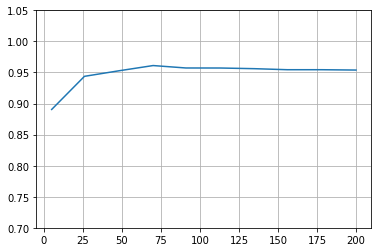

In [72]:
pylab.grid(True)
pylab.ylim((0.7, 1.05))
pylab.plot(ns, scores)

for x, y in zip(ns, scores):
    print('For the number of trees = {} we have score = {}'.format(x, y))

In [78]:
n_features = np.linspace(1, 60, 10).astype(int)
score_features = []
for n in n_features:
    RFC = ensemble.RandomForestClassifier(n_estimators = 100, max_features = n, random_state = 1)
    score_features.append(cross_val_score(RFC, digit_data, digit_label, cv=10).mean())

For the number of features = 1 we have score = 0.9494546545666571
For the number of features = 7 we have score = 0.9555148398109523
For the number of features = 14 we have score = 0.9510914840878921
For the number of features = 20 we have score = 0.9488468793539528
For the number of features = 27 we have score = 0.9404907252279276
For the number of features = 33 we have score = 0.941640781081445
For the number of features = 40 we have score = 0.9460594268356788
For the number of features = 46 we have score = 0.9366737484921821
For the number of features = 53 we have score = 0.9349546930662737
For the number of features = 60 we have score = 0.9276908701942931


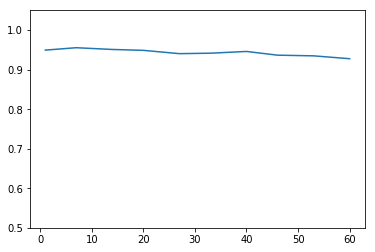

In [79]:
pylab.ylim((0.5, 1.05))
pylab.plot(n_features, score_features)

for x, y in zip(n_features, score_features):
    print('For the number of features = {} we have score = {}'.format(x, y))

In [80]:
RFC_max_depth = ensemble.RandomForestClassifier(n_estimators = 100, max_depth = 5,  random_state = 1)
cross_val_score(RFC_max_depth, digit_data, digit_label, cv=10).mean()

0.9131637566499888

In [82]:
RFC = ensemble.RandomForestClassifier(n_estimators = 100, random_state = 1)
cross_val_score(RFC, digit_data, digit_label, cv=10).mean()

0.9572130012266203